In [1]:
%pip install --upgrade scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import r2_score as AjusteR2
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier,KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.layers import Dense, LSTM, Dropout,GRU
from sklearn.base import BaseEstimator,ClassifierMixin
import warnings; warnings.filterwarnings('ignore')

In [4]:
#@title **Clonando github**
!git clone https://github.com/DenilsonUFPA/ENIAC-2024.git

Cloning into 'ENIAC-2024'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 121 (delta 47), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (121/121), 4.00 MiB | 9.58 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [5]:
dados = pd.read_csv('/content/ENIAC-2024/Dados/Não Linear - RNN - PRMLS/PRMLS03.csv', sep=',',header=None).to_numpy().T
np.shape(dados)

(4804, 3)

In [6]:
# dados = pd.read_csv('coleta_multinivel_01.csv', sep=',').to_numpy()

t = dados[:,0]
u = dados[:,1]
y = dados[:,2]

In [ ]:
# def Norma(u, y):
#   u = u.reshape(-1, 1)
#   y = y.reshape(-1, 1)

#   scaler = MinMaxScaler()

#   u_norm = scaler.fit_transform(u)
#   y_norm = scaler.fit_transform(y)

#   u_unno = scaler.inverse_transform(u_norm)
#   y_unno = scaler.inverse_transform(y_norm)

#   u_norm = u_norm.flatten()
#   y_norm = y_norm.flatten()
#   u_unno = u.flatten()
#   y_unno = y.flatten()

#   return  u_norm, y_norm, u_unno, y_unno

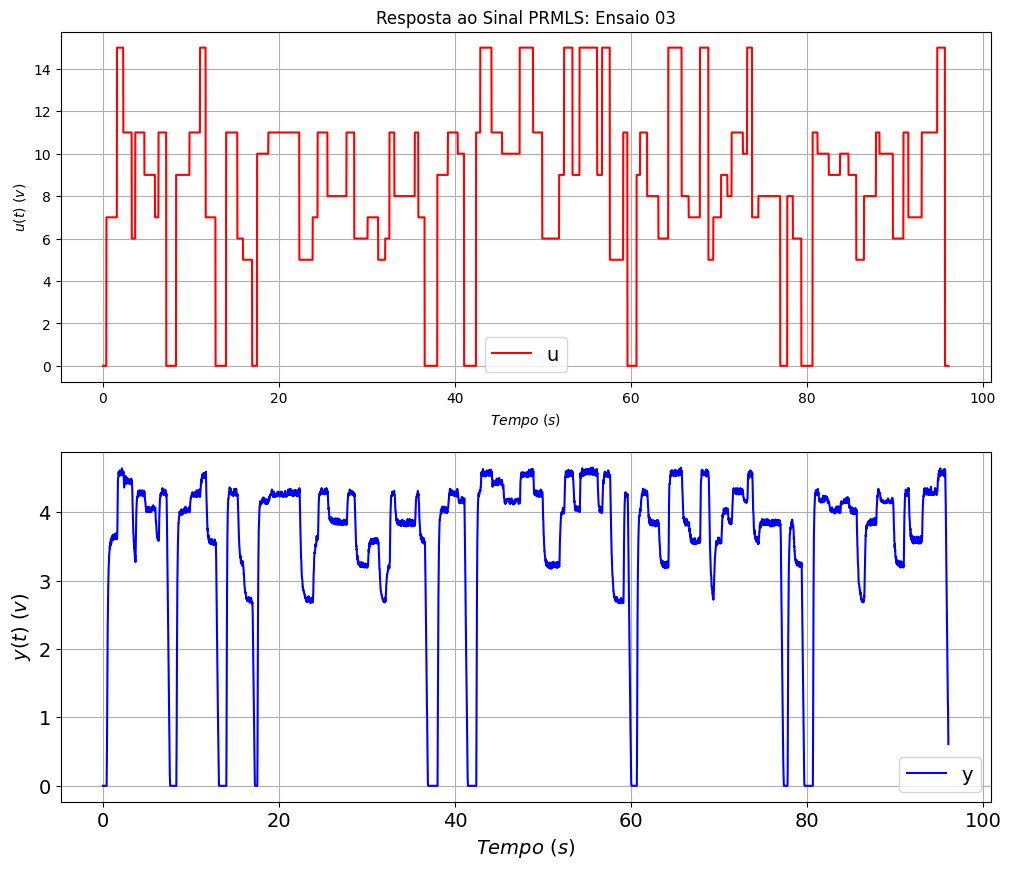

In [8]:
#@title **Resposta Sinal PRMLS: Ensaio 03 - Não Normalizado**
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.title('Resposta ao Sinal PRMLS: Ensaio 03')
plt.rcParams['font.size'] = 14
plt.plot(t, u,'r',label = 'u')
plt.ylabel("$u(t)$ $(v)$")
plt.xlabel("$Tempo$ $(s)$")
plt.grid()
plt.legend()
plt.subplot(212)
plt.rcParams['font.size'] = 14
plt.plot(t, y,'b',label = 'y')
plt.ylabel("$y(t)$ $(v)$")
plt.xlabel("$Tempo$ $(s)$")
plt.grid()
plt.legend()
# plt.savefig('Dados originais.png')
plt.show()

In [ ]:
# u_norm, y_norm, u, y = Norma(u, y)

In [9]:
Xs = np.array([u,y]).T
Ys = np.array([y]).T

# Xs = np.array([u_norm,y_norm]).T
# Ys = np.array([y_norm]).T


In [10]:

percIdent = 0.6
Ns = len(u)       # Percentual de amostras de identificação
Ni = int(Ns*percIdent)  # Número de amostras identificação

Xs_train = Xs[0:Ni]
Ys_train = Ys[0:Ni]

Xs_val = Xs[Ni:]
Ys_val = Ys[Ni:]

Xs_train.shape, Ys_train.shape, Xs_val.shape, Ys_val.shape

((2882, 2), (2882, 1), (1922, 2), (1922, 1))

In [12]:
Nsi = 5
X_train = []
Y_train = []
for i in np.arange(Nsi,len(Xs_train)):
    X_train.append(Xs_train[i-Nsi:i,:])
    Y_train.append(Ys_train[i])

X_val = []
Y_val = []
for i in np.arange(Nsi,len(Xs_val)):
    X_val.append(Xs_val[i-Nsi:i,:])
    Y_val.append(Ys_val[i])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_val, Y_val = np.array(X_val), np.array(Y_val)


In [ ]:
# #Modelo LSTM
# def creat_model_LSTM():

#   model = Sequential()
#   model.add(LSTM(units=100, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
#   model.add(Dropout(0.2))
#   model.add(LSTM(units=100, return_sequences=True))
#   model.add(Dropout(0.2))
#   model.add(LSTM(units=100))
#   model.add(Dropout(0.2))
#   model.add(Dense(units=Y_train.shape[1])) #units = number of outputs
#   model.compile(optimizer = 'adam', loss = 'mse', metrics=['r2_score'])
#   # Parada antecipada:
#   es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

#   return model

In [50]:
def creat_model(celula = 'LSTM'):
  if celula == 'LSTM':
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100))
    model.add(Dropout(0.2))
    model.add(Dense(units=Y_train.shape[1])) #units = number of outputs
    model.compile(optimizer = 'adam', loss = 'mse', metrics=['r2_score'])
    # Parada antecipada:
    es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

  elif celula == 'GRU':

    model = Sequential()
    model.add(GRU(units=100, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(units=100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(units=100))
    model.add(Dropout(0.2))
    model.add(Dense(units=Y_train.shape[1])) #units = number of outputs
    model.compile(optimizer = 'adam', loss = 'mse', metrics=['r2_score'])
    # Parada antecipada:
    es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

  else:
    print('Erro')
  return model

In [51]:
mod_LSTM = creat_model('LSTM')
mod_LSTM.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 5, 100)              │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 5, 100)              │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,101 (789.46 KB)

 Trainable params: 202,101 (789.46 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
mod_GRU = creat_model('GRU')
mod_GRU.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                          │ (None, 5, 100)              │          31,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 5, 100)              │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_8 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,501 (595.71 KB)

 Trainable params: 152,501 (595.71 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_kerasRegressor = KerasRegressor(build_fn=creat_model('GRU'), verbose=2, loss='mse',metrics=['r2_score'])
model_kerasRegressor

KerasRegressor(
	model=None
	build_fn=<Sequential name=sequential_9, built=True>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=mse
	metrics=['r2_score']
	batch_size=None
	validation_batch_size=None
	verbose=2
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [54]:
model_kerasRegressor.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs'])

In [55]:
params={
        'batch_size':[5,20,50],
        'epochs':[5,30,50]
       }

In [56]:
grid = GridSearchCV(estimator=model_kerasRegressor, param_grid=params, cv=2, verbose=2)
grid

GridSearchCV(cv=2,
             estimator=KerasRegressor(build_fn=<Sequential name=sequential_9, built=True>, loss='mse', metrics=['r2_score'], verbose=2),
             param_grid={'batch_size': [5, 20, 50], 'epochs': [5, 30, 50]},
             verbose=2)

In [57]:
import time
t0 = time.time()

grid_result = grid.fit(X_val, Y_val, verbose=2, validation_data=(X_train, Y_train))
t1 = time.time()

print('Runtime: %.2f s' %(t1-t0))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Epoch 1/5
192/192 - 11s - 58ms/step - loss: 0.3769 - r2_score: 0.7389 - val_loss: 0.0506 - val_r2_score: 0.9661
Epoch 2/5
192/192 - 5s - 25ms/step - loss: 0.1055 - r2_score: 0.9269 - val_loss: 0.0122 - val_r2_score: 0.9918
Epoch 3/5
192/192 - 6s - 30ms/step - loss: 0.0833 - r2_score: 0.9423 - val_loss: 0.0112 - val_r2_score: 0.9925
Epoch 4/5
192/192 - 9s - 48ms/step - loss: 0.0662 - r2_score: 0.9542 - val_loss: 0.0080 - val_r2_score: 0.9946
Epoch 5/5
192/192 - 5s - 27ms/step - loss: 0.0641 - r2_score: 0.9556 - val_loss: 0.0185 - val_r2_score: 0.9876
192/192 - 1s - 8ms/step
[CV] END .............................batch_size=5, epochs=5; total time=  38.1s
Epoch 1/5
192/192 - 11s - 55ms/step - loss: 0.3708 - r2_score: 0.5573 - val_loss: 0.0218 - val_r2_score: 0.9854
Epoch 2/5
192/192 - 4s - 20ms/step - loss: 0.0907 - r2_score: 0.8917 - val_loss: 0.0752 - val_r2_score: 0.9496
Epoch 3/5
192/192 - 7s - 35ms/step - loss: 0.0844 - r2_s

In [58]:
best = grid_result.best_estimator_
ajuste_r2 =(best.history_['r2_score'])
ajuste_r2 = np.array(ajuste_r2)*100
ajuste_r2 = np.around(ajuste_r2,3)

loss =(best.history_['loss'])
loss = np.array(loss)
loss = np.around(loss,3)

print('Melhores Parâmetros (gridsearch)')
print('batch_size: ', best.get_params()['batch_size'])
print('epochs: ', best.get_params()['epochs'])
print('Ajuste R2: ', ajuste_r2,'%')
print('Loss: ',loss )

Melhores Parâmetros (gridsearch)
batch_size:  50
epochs:  30
Ajuste R2:  [-0.692 84.64  88.453 90.936 91.806 92.808 92.929 93.623 94.289 94.631
 94.826 95.127 95.493 95.335 95.398 95.298 95.874 95.673 95.937 95.696
 96.26  95.974 96.224 96.048 95.656 96.006 96.107 95.948 96.154 96.101] %
Loss:  [1.157 0.176 0.133 0.104 0.094 0.083 0.081 0.073 0.066 0.062 0.059 0.056
 0.052 0.054 0.053 0.054 0.047 0.05  0.047 0.049 0.043 0.046 0.043 0.045
 0.05  0.046 0.045 0.047 0.044 0.045]


In [59]:
cv_results = grid_result.cv_results_

# Iterar sobre os diferentes modelos testados
for i in range(len(cv_results['params'])):
    print(f"Model {i+1}")
    print(f"Parameters: {cv_results['params'][i]}")
    print(f"Mean test score: {cv_results['mean_test_score'][i]}")
    print(f"Standard deviation of test score: {cv_results['std_test_score'][i]}")
    print()

Model 1
Parameters: {'batch_size': 5, 'epochs': 5}
Mean test score: 0.9854388257823504
Standard deviation of test score: 0.005208359410069585

Model 2
Parameters: {'batch_size': 5, 'epochs': 30}
Mean test score: 0.9941411046501343
Standard deviation of test score: 0.0004675983703399389

Model 3
Parameters: {'batch_size': 5, 'epochs': 50}
Mean test score: 0.9914833314678373
Standard deviation of test score: 0.0009719336098911735

Model 4
Parameters: {'batch_size': 20, 'epochs': 5}
Mean test score: 0.9895641986869979
Standard deviation of test score: 0.0003919245196214449

Model 5
Parameters: {'batch_size': 20, 'epochs': 30}
Mean test score: 0.9932167985871904
Standard deviation of test score: 0.0020287588628237208

Model 6
Parameters: {'batch_size': 20, 'epochs': 50}
Mean test score: 0.9939912183843779
Standard deviation of test score: 0.00171961953828903

Model 7
Parameters: {'batch_size': 50, 'epochs': 5}
Mean test score: 0.951365541813471
Standard deviation of test score: 0.009317366

In [60]:
# # Initialize LSTM model
model = Sequential()

model.add(LSTM(units=100, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=Y_train.shape[1])) #units = number of outputs
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['r2_score'])

# Oarada antecipada:
es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

In [61]:
# Treina modelo LSTM:
import time
t0 = time.time()
#bath_size = 15, epochs = 15, verbose = 2
DadosTreino = model.fit(X_train, Y_train, epochs =  best.get_params()['epochs'], batch_size = best.get_params()['batch_size'] , verbose=2, validation_data=(X_val, Y_val))
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/30
58/58 - 8s - 144ms/step - loss: 1.6129 - r2_score: -8.0872e-02 - val_loss: 0.0982 - val_r2_score: 0.9146
Epoch 2/30
58/58 - 2s - 38ms/step - loss: 0.1194 - r2_score: 0.9200 - val_loss: 0.0204 - val_r2_score: 0.9823
Epoch 3/30
58/58 - 3s - 47ms/step - loss: 0.0821 - r2_score: 0.9450 - val_loss: 0.0102 - val_r2_score: 0.9911
Epoch 4/30
58/58 - 3s - 46ms/step - loss: 0.0767 - r2_score: 0.9486 - val_loss: 0.0129 - val_r2_score: 0.9888
Epoch 5/30
58/58 - 2s - 38ms/step - loss: 0.0675 - r2_score: 0.9547 - val_loss: 0.0089 - val_r2_score: 0.9922
Epoch 6/30
58/58 - 3s - 51ms/step - loss: 0.0630 - r2_score: 0.9578 - val_loss: 0.0057 - val_r2_score: 0.9950
Epoch 7/30
58/58 - 4s - 72ms/step - loss: 0.0588 - r2_score: 0.9606 - val_loss: 0.0197 - val_r2_score: 0.9828
Epoch 8/30
58/58 - 3s - 50ms/step - loss: 0.0561 - r2_score: 0.9624 - val_loss: 0.0141 - val_r2_score: 0.9878
Epoch 9/30
58/58 - 2s - 33ms/step - loss: 0.0533 - r2_score: 0.9643 - val_loss: 0.0045 - val_r2_score: 0.9961
Epoc

In [62]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 5, 100)              │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 5, 100)              │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 606,305 (2.31 MB)

 Trainable params: 202,101 (789.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 404,204 (1.54 MB)

In [63]:
#Salvando o Resultado
import joblib
# joblib.dump(DadosTreino.history,'resultado-29-07.joblib')

In [64]:
# Salvando o modelo:
# model.save('Modelo-29-07.keras')

In [65]:
# Predição com dados de treinamento e de validação:
Yp_train = model.predict(X_train)
Yp_val = model.predict(X_val)

90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


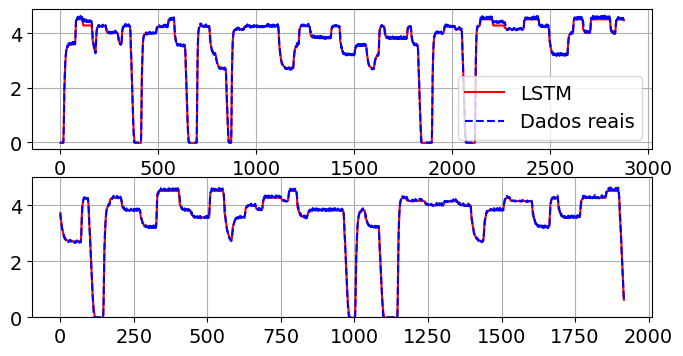

In [66]:
plt.figure(0, figsize=(8,4))
plt.subplot(211)
plt.plot(Yp_train[0:],'r-',label='LSTM')
plt.plot(Y_train[0:],'b--',label='Dados reais')
plt.legend(loc="lower right")
plt.grid()

plt.subplot(212)
plt.plot(Yp_val[0:],'r-',label='LSTM')
plt.plot(Y_val[0:],'b--',label='Dados reais')
plt.ylim((0,5))
plt.grid()
plt.show()

In [67]:
from sklearn.metrics import r2_score as AjusteR2

print('AJuste de treinamento = ', AjusteR2(Yp_train,Y_train))
print('AJuste de validação = ', AjusteR2(Yp_val,Y_val))

AJuste de treinamento =  0.9978723204209167
AJuste de validação =  0.9980714949801909


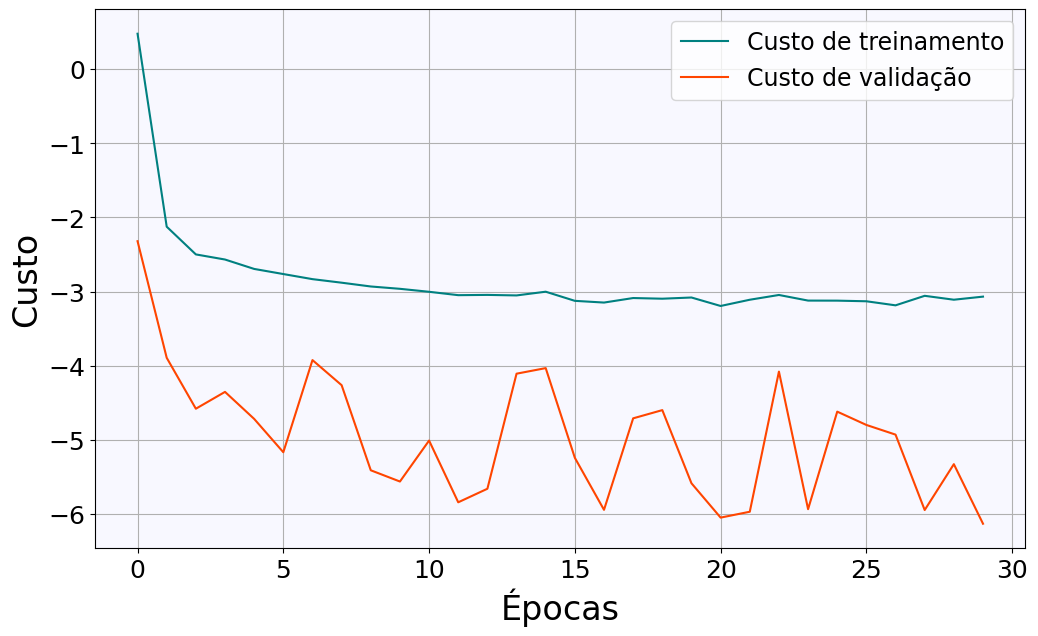

In [70]:
#@title **Loss e Val Loss**
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

loss = DadosTreino.history['loss']
val_loss = DadosTreino.history['val_loss']

cor_trein = "Teal"
cor_valid = "OrangeRed"
esp_linha = 1.5
fundo='GhostWhite'

# Criando o gráfico principal
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(np.log(loss), cor_trein, linewidth=esp_linha)
ax.plot(np.log(val_loss), cor_valid, linewidth=esp_linha)
# ax.set_ylim(-8.3,-4)
ax.set_ylabel("Custo", loc='center', fontsize='24')
ax.set_xlabel('Épocas', loc='center', fontsize='24')
ax.tick_params(labelsize=18)
ax.grid()
ax.legend(["Custo de treinamento", "Custo de validação"], fontsize='17')
ax.set_facecolor(fundo)

plt.show()

In [71]:
# #@title **Ajuste (ok)**

# import numpy as np
# import matplotlib.pyplot as plt

# N_horas = 10
# ajuste1 = np.zeros(N_horas)
# ajuste2 = np.zeros(N_horas)
# ajuste3 = np.zeros(N_horas)

# # Assuming R2 function is defined elsewhere
# # You may need to import it or define it

# for n in np.arange(0, N_horas):
#     ajuste1[n] = 100 * R2(y_teste1[:,n], yp1[:,n])
#     ajuste2[n] = 100 * R2(y_teste1[:,n], yp2[:,n])
#     ajuste3[n] = 100 * R2(y_teste1[:,n], yp3[:,n])

# plt.figure(figsize=(12, 6))

# # plt.subplot(311)
# # plt.title('Modelo 1')
# plt.plot(ajuste1, label='Modelo LSTM $\mathcal{H}_1$')
# for i, txt in enumerate(ajuste3):
#     plt.text(i, ajuste3[i], '{:.2f}'.format(txt), color ='Black',ha='center', va='bottom', fontsize = '16')
# plt.plot(ajuste2, label='Modelo LSTM $\mathcal{H}_2$')
# plt.plot(ajuste3, label='Modelo LSTM $\mathcal{H}_3$')
# plt.plot(ajuste3, 'xr')
# plt.ylim((97, 100.4))
# plt.xticks(np.arange(10), np.arange(1, 11))
# plt.grid()
# plt.tick_params(labelsize=18)
# plt.ylabel('Ajuste por $R^2$ (%)',fontsize ='24')
# plt.xlabel('Amostra (h)',fontsize ='24')
# plt.legend(fontsize ='21')
# # plt.savefig('ajuste.jpg')
# plt.show()

# # x
# # y Ajuste por R2 (%)